In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# Đọc dữ liệu
df = pd.read_excel("hanoi.xlsx")

In [2]:
phuong_values = df['Phường'].unique()
ngo_values = df['loại ngõ'].unique()
duong_values = df['loại đường'].unique()
quan_values = df['Quận'].unique()

# Tạo từ điển ánh xạ cho các cột Phường
dummi1 = pd.get_dummies(df['Phường'])
phuong_mapping = {phuong: f"{phuong}" for phuong in phuong_values}

# Tạo từ điển ánh xạ cho loại ngõ nếu bạn đã dùng dummies
dummi2 = pd.get_dummies(df['loại ngõ'])
ngo_mapping = {ngo: f"{ngo}" for ngo in ngo_values}
# Tạo từ điển ánh xạ cho các cột Phường
dummi3 = pd.get_dummies(df['loại đường'])
duong_mapping = {duong: f"{duong}" for duong in duong_values}
# Tạo từ điển ánh xạ cho các cột Phường
dummi4 = pd.get_dummies(df['Quận'])
quan_mapping = {quan: f"{quan}" for quan in quan_values}


In [3]:
df1=pd.concat([df,dummi1,dummi2,dummi3,dummi4], axis = 'columns')


In [4]:
df1.head()

,Ngày đăng,Giấy tờ pháp lý,thang máy,gara để ô tô,vỉa hè đỗ ô tô,nhà 2 mặt tiền,nhà 3 mặt tiền,PCCC,Quy hoạch,gần bệnh viện,...,Cấu Giấy,Hai Bà Trưng,Hoàn Kiếm,Hoàng Mai,Hà Đông,Long Biên,Nam Từ Liêm,Thanh Xuân,Tây Hồ,Đống Đa
0,15/10/2024,không,không,có,có,có,không,không,không,có,...,0,0,0,0,0,0,0,0,0,0
1,09/10/2024,có,có,không,có,không,không,không,không,có,...,0,0,0,0,0,0,0,0,0,0
2,15/10/2024,có,không,không,có,có,không,không,không,có,...,0,0,0,0,0,0,0,0,0,0
3,08/10/2024,có,có,không,có,không,có,không,không,có,...,0,0,0,0,0,0,0,0,0,0
4,07/10/2024,có,không,không,có,có,không,không,không,không,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Chuyển các giá trị "có" thành 1 và "không" thành 0
cols_to_binary = ['thang máy', 'Giấy tờ pháp lý', 'gara để ô tô', 'vỉa hè đỗ ô tô', 'nhà 2 mặt tiền', 'nhà 3 mặt tiền', 'PCCC', 'Quy hoạch', 'gần bệnh viện', 'gần chợ', 'gần trường tiểu học', 'gần trường trung học cơ sở', 'gần trường trung học phổ thông', 'gần đại học', 'gần siêu thị trung tâm mua sắm', 'gần bến xe', 'gần công an phường', 'gần ủy ban nhân dân', 'gần bãi đỗ xe', 'gần công viên', 'Nội thất đầy đủ' ] # liệt kê các cột cần chuyển

for col in cols_to_binary:
    df1[col] = df1[col].map({'có': 1, 'không': 0})
df1.head()


,Ngày đăng,Giấy tờ pháp lý,thang máy,gara để ô tô,vỉa hè đỗ ô tô,nhà 2 mặt tiền,nhà 3 mặt tiền,PCCC,Quy hoạch,gần bệnh viện,...,Cấu Giấy,Hai Bà Trưng,Hoàn Kiếm,Hoàng Mai,Hà Đông,Long Biên,Nam Từ Liêm,Thanh Xuân,Tây Hồ,Đống Đa
0,15/10/2024,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,09/10/2024,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,15/10/2024,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,08/10/2024,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,07/10/2024,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df2 = df1.drop(columns=['Ngày đăng', 'loại ngõ', 'loại đường', 'Phường', 'Quận'])


In [7]:
df2.head()

,Giấy tờ pháp lý,thang máy,gara để ô tô,vỉa hè đỗ ô tô,nhà 2 mặt tiền,nhà 3 mặt tiền,PCCC,Quy hoạch,gần bệnh viện,gần chợ,...,Cấu Giấy,Hai Bà Trưng,Hoàn Kiếm,Hoàng Mai,Hà Đông,Long Biên,Nam Từ Liêm,Thanh Xuân,Tây Hồ,Đống Đa
0,0,0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X=df2.drop(columns=['Giá tiền'])
X.head()


,Giấy tờ pháp lý,thang máy,gara để ô tô,vỉa hè đỗ ô tô,nhà 2 mặt tiền,nhà 3 mặt tiền,PCCC,Quy hoạch,gần bệnh viện,gần chợ,...,Cấu Giấy,Hai Bà Trưng,Hoàn Kiếm,Hoàng Mai,Hà Đông,Long Biên,Nam Từ Liêm,Thanh Xuân,Tây Hồ,Đống Đa
0,0,0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y=df2['Giá tiền']
Y.head()


0    12.5
1    56.0
2    30.0
3    25.0
4    59.0
Name: Giá tiền, dtype: float64

In [12]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=19)


In [50]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.7586932727752276

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Khởi tạo mô hình Random Forest
rf_clf = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_clf.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = rf_clf.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 23.852513441019784


Giá trung bình của Giá tiền: 14.377495599221788
Root Mean Squared Error: 4.8839035044746515
Mean Absolute Error: 2.929810085680613
R-squared: 0.7919051263948156


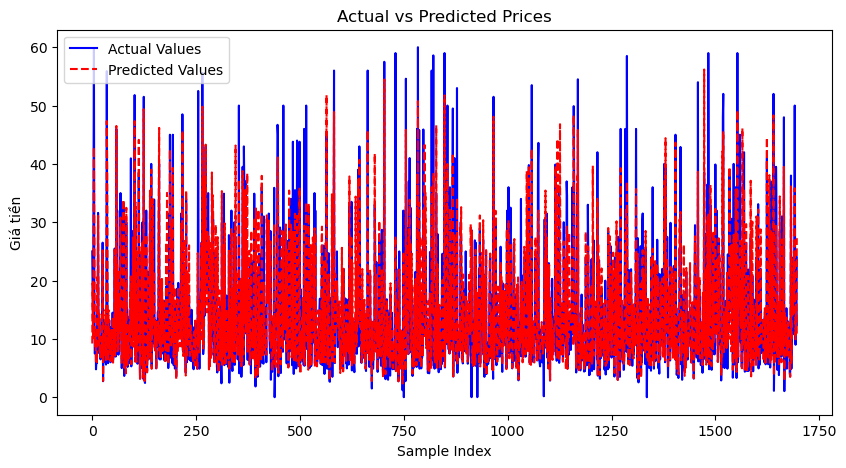

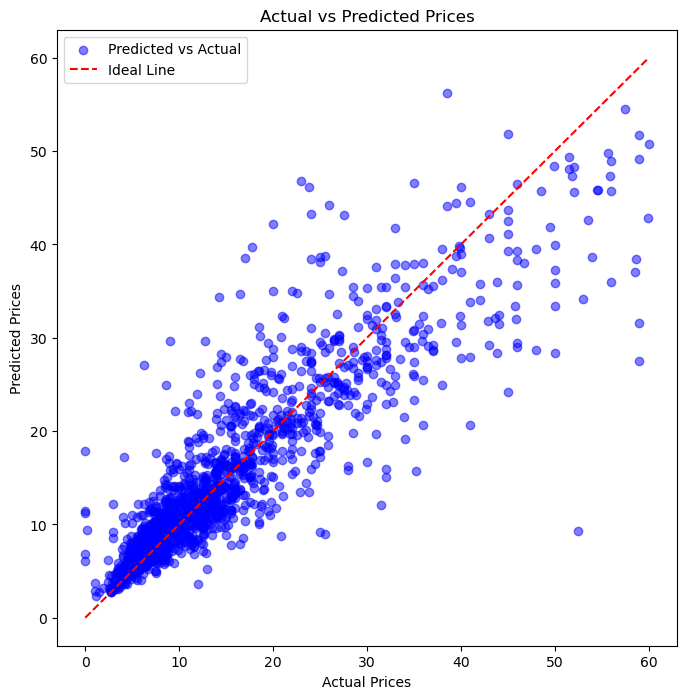

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Tính các chỉ số đánh giá
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
average_price = df['Giá tiền'].mean()
print(f'Giá trung bình của Giá tiền: {average_price}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Vẽ đồ thị giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed', label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Giá tiền')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Thiết lập ShuffleSplit cho cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

# Tính toán cross-validation score
cross_val_score(RandomForestRegressor(), X, Y, cv=cv, scoring='neg_mean_squared_error')

In [151]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Giả sử X và Y đã được định nghĩa từ trước
find_best_model_using_gridsearchcv(X, Y)


,model,best_score,best_params
0,linear_regression,0.730538,{'fit_intercept': True}
1,lasso,0.586653,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.569737,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [71]:
print(X.columns.tolist())


['Giấy tờ pháp lý', 'thang máy', 'gara để ô tô', 'vỉa hè đỗ ô tô', 'nhà 2 mặt tiền', 'nhà 3 mặt tiền', 'PCCC', 'Quy hoạch', 'gần bệnh viện', 'gần chợ', 'gần trường tiểu học', 'gần trường trung học cơ sở', 'gần trường trung học phổ thông', 'gần đại học', 'gần siêu thị trung tâm mua sắm', 'gần bến xe', 'gần công an phường', 'gần ủy ban nhân dân', 'gần bãi đỗ xe', 'gần công viên', 'Nội thất đầy đủ', 'Diện tích', 'Số tầng', 'Số phòng ngủ', 'Số toilet', 'Bách Khoa', 'Bạch Mai', 'Bạch Đằng', 'Biên Giang', 'Bùi Thị Xuân', 'Bưởi', 'Bồ Đề', 'Cát Linh', 'Chương Dương', 'Cống Vị', 'Cửa Nam', 'Cầu Diễn', 'Cầu Dền', 'Cổ Nhuế', 'Cửa Đông', 'Cự Khối', 'Dương Nội', 'Dịch Vọng', 'Dịch Vọng Hậu', 'Gia Thụy', 'Giang Biên', 'Giảng Võ', 'Giáp Bát', 'Hàng Bài', 'Hàng Bạc', 'Hàng Bông', 'Hàng Bồ', 'Hàng Bột', 'Hàng Gai', 'Hàng Mã', 'Hàng Trống', 'Hàng Đào', 'Hoàng Liệt', 'Hoàng Văn Thụ', 'Hà Cầu', 'Hàng Buồm', 'Hạ Đình', 'Khâm Thiên', 'Khương Mai', 'Khương Thượng', 'Khương Trung'

In [72]:
import numpy as np
import pandas as pd

def predict_price(giayto, thangmay, gara, viahe, two_mat, three_mat, pccc, qh, benhvien, cho, th, thcs, thpt, dh, sieuthi, benxe, ca, ubnd, baixe, congvien, loaingo, loaiduong, phuong, quan, noithat, area, floors, bedrooms, bathrooms):
    # Giả sử X là DataFrame huấn luyện của bạn với tất cả các đặc trưng one-hot encoding và các cột diện tích, số tầng, số phòng ngủ, số toilet
    x = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)

    # Gán giá trị cho các cột liên quan đến diện tích, số tầng, số phòng ngủ, số toilet
    x['Diện tích'] = area
    x['Số tầng'] = floors
    x['Số phòng ngủ'] = bedrooms
    x['Số toilet'] = bathrooms
    
    # Thiết lập giá trị cho giấy tờ pháp lý
    x['Giấy tờ pháp lý'] = 1 if giayto else 0
    
    # Thiết lập giá trị cho thang máy
    x['thang máy'] = 1 if thangmay else 0
    
    # Thiết lập giá trị cho gara
    x['gara để ô tô'] = 1 if gara else 0
    
    # Thiết lập giá trị cho vỉa hè
    x['vỉa hè đỗ ô tô'] = 1 if viahe else 0
    
    # Thiết lập giá trị cho các đặc trưng one-hot encoding
    # Thiết lập giá trị cho các đặc trưng one-hot encoding
    x[ngo_mapping[loaingo]] = 1
    x[duong_mapping[loaiduong]] = 1
    x[phuong_mapping[phuong]] = 1
    x[quan_mapping[quan]] = 1

    # Thiết lập giá trị cho các đặc trưng gần kề
    x['gần bệnh viện'] = 1 if benhvien else 0
    x['gần chợ'] = 1 if cho else 0
    x['gần trường tiểu học'] = 1 if th else 0
    x['gần trường trung học cơ sở'] = 1 if thcs else 0
    x['gần trường trung học phổ thông'] = 1 if thpt else 0
    x['gần đại học'] = 1 if dh else 0
    x['gần siêu thị trung tâm mua sắm'] = 1 if sieuthi else 0
    x['gần bến xe'] = 1 if benxe else 0
    x['gần công an phường'] = 1 if ca else 0
    x['gần ủy ban nhân dân'] = 1 if ubnd else 0
    x['gần bãi đỗ xe'] = 1 if baixe else 0
    x['gần công viên'] = 1 if congvien else 0

    # Thiết lập giá trị cho quy hoạch và nội thất đầy đủ
    x['PCCC'] = 1 if pccc else 0
    x['Quy hoạch'] = 1 if qh else 0
    x['Nội thất đầy đủ'] = 1 if noithat else 0
    
    # Dự đoán giá
    return rf_clf.predict(x)[0]  # lr_clf là mô hình hồi quy đã huấn luyện


In [73]:
predict_price(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 'ngõ xe ba gác tránh', 'không có thông tin loại đường', 'Quỳnh Mai', 'Hai Bà Trưng', 1, 100, 5, 4, 5)

24.275

In [75]:
import pickle
with open('hanoi1_home_prices_model.pickle','wb') as f:
    pickle.dump(rf_clf,f)

In [58]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

# Ghi file JSON với ensure_ascii=False
with open("columns.json", "w", encoding='utf-8') as f:
    json.dump(columns, f, ensure_ascii=False)
